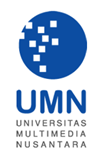
<center>
    <h3>UJIAN AKHIR SEMESTER GENAP TAHUN AKADEMIK 2023/2024</h3>
    <h3>PROGRAM STUDI INFORMATIKA</h3>
    <h3>FAKULTAS TEKNIK DAN INFORMATIKA</h3>
    <h3>UNIVERSITAS MULTIMEDIA NUSANTARA</h3>

<hr/>

<h3 style='color:blue'>IF420 - Analisis Numerik</h3>

<hr/>
</center>

<b>Petunjuk:</b>
<ul>
    <li>Gunakan file template jawaban UAS ini untuk <b>SOAL B</b></li>
    <li>Setiap butir pertanyaan memiliki bobot penilaiannya masing-masing</li>
    <li>Usahakan untuk mengerjakan setiap butir pertanyaan sesuai dengan perintah yang diberikan dan di tempat yang disediakan</li>
    <li>Tulis nama dan NIM Anda di dalam blok cell di bawah ini! Tampilkan dengan perintah print!</li>
</ul>

In [371]:
# input nama dan nim Anda di sini, lalu tampilkan dengan perintah print
nama = 'Fidel Brian Dava'
nim = '00000073866'
print(f'Nama:\n {nama}')
print(f'NIM:\n {nim}')

Nama:
 Fidel Brian Dava
NIM:
 00000073866


<u><h3>SOAL 1 (Total Bobot: 20%)</h3></u>

<h4>Soal 1 A (Bobot: 10%)</h4>
Buatlah sebuah fungsi <b>my_num_diff_w_smoothing(x,y,n)</b> dengan output [dy, X], dimana x dan y adalah 1D numpy array dengan panjang yang sama dan n adalah suatu bilangan bulat positif.<br/>
Pertama, fungsi tersebut akan membuat sebuah vektor yang terdiri atas titik-titik data y yang telah diperhalus (smoothed) dengan menerapkan formula
<center>
$ysmooth[i] = np.mean(y[i-n:i+n])$
</center>
Selanjutnya, fungsi tersebut akan menghitung dy, yakni turunan dari vektor y-smoothed tersebut dengan menggunakan metode <b>central difference</b>. Selain mengembalikan dy, fungsi tersebut juga akan mengembalikan output berupa 1D array X yang memiliki ukuran panjang yang sama dengan dy dan merepresentasikan nilai-nilai x dimana dy berlaku.<br/>
Asumsikan bahwa data x berada dalam urutan naik tanpa ada dua nilai yang sama (tidak ada duplikasi) dan elemen-elemen x bisa jadi tidak memiliki jarak yang sama satu dengan lainnya. Perhatikan bahwa output dy akan memiliki 2n+2 titik lebih sedikit daripada y, serta asumsikan bahwa panjang dari y jauh lebih besar daripada 2n+2.

In [372]:
# my_num_diff_w_smoothing function (Max Points: 10%)
# import all needed libraries
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-poster')
%matplotlib inline

def my_num_diff_w_smoothing(x, y, n):
    # put your codes here
    ysmooth = np.zeros(len(y))
    for i in range(n, len(y) - n):
        ysmooth[i] = np.mean(y[i - n:i + n + 1])

    dy = np.zeros(len(y) - 2 * n)
    for i in range(n, len(y) - n):
        dy[i - n] = (ysmooth[i + n] - ysmooth[i - n]) / (x[i + n] - x[i - n])

    X = x[n:len(x) - n]
    return [dy, X]

<h4>Soal 1 B (Bobot: 10%)</h4>
Lakukan pengecekan terhadap fungsi yang telah dibuat dengan nilai x, y, dan n yang didefinisikan sebagai berikut:<br/>

$x = np.linspace(0, 2*np.pi, 100)$

$y = np.cos(x) + np.random.randn(len(x))/100$

$n = 4$

Plot hasilnya untuk solusi fungsi tersebut serta bandingkan dengan plot turunan fungsi tersebut secara analitik, yakni <b>dy = -np.sin(x)</b>

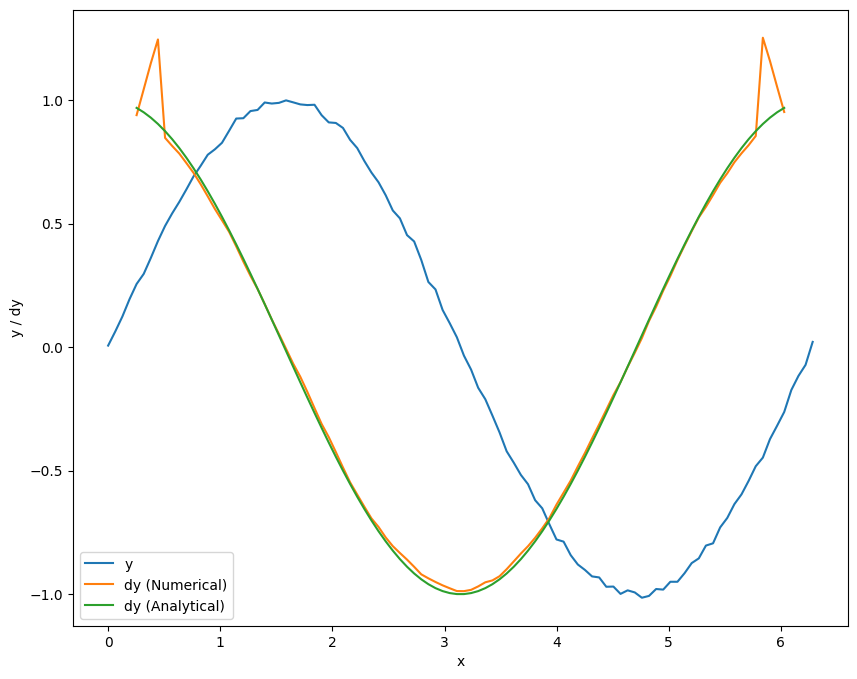

In [373]:
# test case (Max Points: 5%)
# put your codes here
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100
n = 4
dy, X = my_num_diff_w_smoothing(x, y, n)
dy_analytical = np.cos(x[n:len(x) - n])

# plot the estimation and analytic results (Max Points: 5%)
# put your codes here
plt.figure(figsize=(10, 8))
plt.plot(x, y, label='y')
plt.plot(X, dy, label='dy (Numerical)')
plt.plot(x[n:len(x) - n], dy_analytical, label='dy (Analytical)')
plt.xlabel('x')
plt.ylabel('y / dy')
plt.legend()
plt.show()

<u><h3>SOAL 2 (Total Bobot: 10%)</h3></u>

Kita telah mengetahui bahwa beberapa fungsi dapat dinyatakan sebagai jumlahan tak hingga atas polinomial (ingat kembali Deret Taylor). Fungsi-fungsi lainnya, terutama fungsi-fungsi periodik, dapat ditulis sebagai jumlahan tak hingga fungsi sinus dan cosinus, seperti ditunjukkan dalam persamaan **Deret Fourier** berikut:

$f(x)=\frac{A_0}{2}+\sum_{n=1}^{\infty} A_n cos(nx)+B_n sin(nx)$

Dapat ditunjukkan bahwa nilai-nilai dari $A_n$ dan $B_n$ bisa dihitung dengan menggunakan dua rumus berikut:

$A_n=\frac{1}{π}\int_{-π}^{π} f(x) cos(nx) dx$

$B_n=\frac{1}{π}\int_{-π}^{π} f(x) sin(nx) dx$

Sama seperti Deret Taylor, fungsi-fungsi juga dapat diperkirakan dengan memotong Deret Fourier pada suatu n=N. Deret Fourier dapat digunakan untuk memperkirakan beberapa fungsi khusus, seperti step function, dan banyak dipakai dalam aplikasi teknik seperti dalam pemrosesan sinyal.

Buatlah sebuah fungsi <b>my_fourier_coef(f,n)</b>, dengan output $[A_n,B_n]$, dimana f adalah suatu obyek fungsi yang memiliki periode $2π$. Fungsi my_fourier_coef harus mampu menghitung koefisien ke-n Fourier, $A_n$ dan $B_n$, dalam Deret Fourier untuk f, yang didefinisikan dengan dua rumus di atas. Anda dapat menggunakan fungsi <b>quad</b> dari scipy.integrate untuk melakukan integrasi.

Setelah itu, gunakan fungsi <b>plot_results(f,N)</b> yang telah disediakan untuk mengecek fungsi my_fourier_coef yang Anda siapkan dengan detail input berikut:<br/>
(1) $f = np.sin(np.exp(x)), N = 2 $ <br/>
(2) Obyek fungsi yang sama seperti di poin (1) namun dengan $N = 20$

In [374]:
# DON'T CHANGE CODE in this cell

# import any needed libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad 

# this is a given code to plot the results
def plot_results(f, N):
    x = np.linspace(-np.pi, np.pi, 10000)
    [A0, B0] = my_fourier_coef(f, 0)
    y = A0*np.ones(len(x))/2
    for n in range(1, N):
        [An, Bn] = my_fourier_coef(f, n)
        y += An*np.cos(n*x)+Bn*np.sin(n*x)
    plt.figure(figsize = (10,6))
    plt.plot(x, f(x), label = 'analytic')
    plt.plot(x, y, label = 'approximate')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    plt.title(f'{N}th Order Fourier Approximation')
    plt.show()

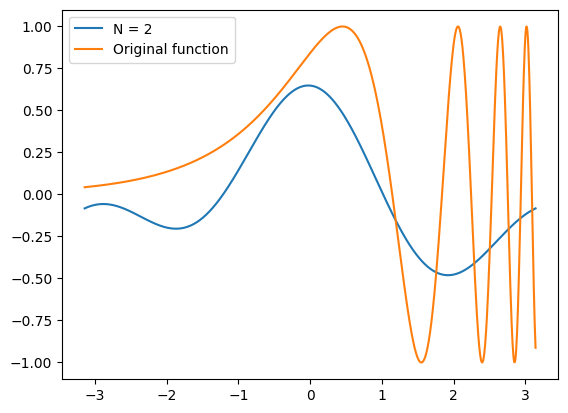

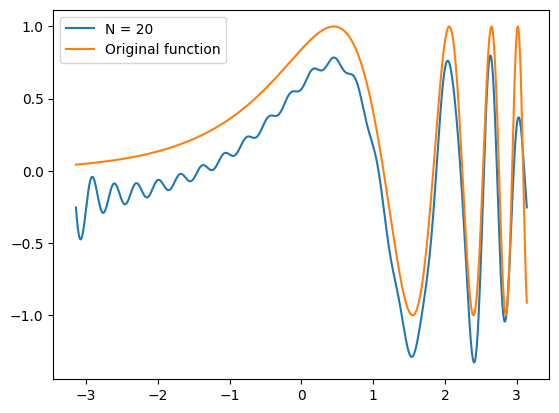

In [375]:
# my_fourier_coef(f,n) function (Max Points: 5%)

def my_fourier_coef(f,n):
    # put your codes here
    def cos_integrand(x):
        return f(x) * np.cos(n * x)

    def sin_integrand(x):
        return f(x) * np.sin(n * x)

    # Perform the integration
    An, _ = quad(cos_integrand, -np.pi, np.pi)
    Bn, _ = quad(sin_integrand, -np.pi, np.pi)

    # Normalize the results
    An /= np.pi
    Bn /= np.pi

    return [An, Bn]
    
# Test case 1 (Max Points: 3%)
# put your codes here
def plot_results(f, N):
    x = np.linspace(-np.pi, np.pi, 1000)
    y = np.zeros_like(x)

    for n in range(1, N+1):
        An, Bn = my_fourier_coef(f, n)
        y += An * np.cos(n * x) + Bn * np.sin(n * x)

    plt.plot(x, y, label=f'N = {N}')
    plt.plot(x, f(x), label='Original function')
    plt.legend()
    plt.show()

# Another test case 2 - different order (Max Points: 2%)
# put your codes here
f = lambda x: np.sin(np.exp(x))
plot_results(f, N=2)
plot_results(f, N=20)



<u><h3>SOAL 3 (Total Bobot: 20%)</h3></u>

Persamaan diferensial $\frac{df(t)}{dt}=cos(2t)$ dengan kondisi awal $f_0=0$ memiliki solusi exact $f(t)=0.5*sin(2t)$.
Carilah perkiraan solusi terhadap permasalahan nilai awal ini di antara 0 hingga $np.pi$ dengan kenaikan langkah sebesar 0.05 menggunakan dua pendekatan, yakni:
<ul>
    <li>Explicit Euler Method</li>
    <li>Fungsi built-in <b>solve_ivp</b> yang tersedia dalam module scipy.integrate</li>
</ul>
Selanjutnya, plot hasil perkiraannya baik dengan metode <b>eksplisit Euler</b> maupun dengan <b>solve_ivp</b> serta solusi <b>exact</b>-nya di dalam satu canvas gambar yang sama.

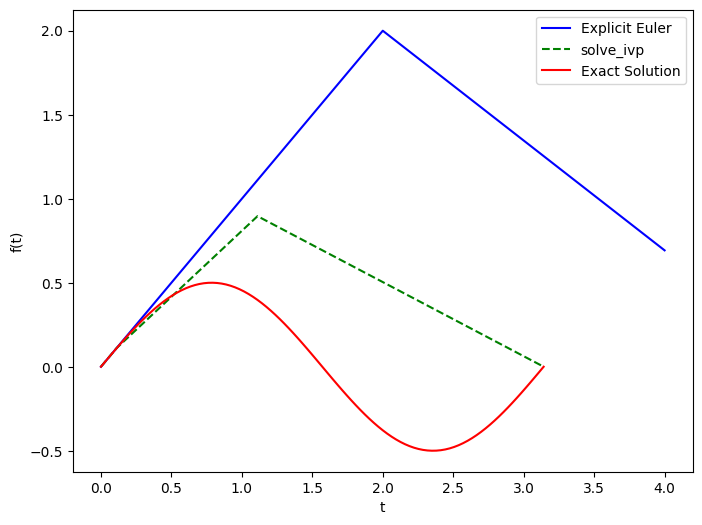

In [376]:
# import libraries and define initial parameters (Max Points: 5%)
from scipy.integrate import solve_ivp

def df(t, y):
    return np.cos(2*t)

def exact_solution(t):
    return 0.5 * np.sin(2*t)

# Explicit Euler Method (Max Points: 5%)
def explicit_euler(df, t_span, y0, h):
    t_start, t_end = t_span
    t = np.arange(t_start, t_end + h, h)
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    for i in range(n - 1):
        y[i + 1] = y[i] + h * df(t[i], y[i])
    return t, y
t_explicit, y_explicit = explicit_euler(df, t_span, y0, h)

# using built-in function - solve_ivp (Max Points: 5%)
sol = solve_ivp(df, t_span, [y0], dense_output=True)
t_solve_ivp = np.linspace(t_span[0], t_span[1], 100)
y_solve_ivp = sol.sol(t_solve_ivp)[0]
t_exact = np.linspace(t_span[0], t_span[1], 100)
y_exact = exact_solution(t_exact)

# plot the results - exact solution, approx with Explicit Euler, approx with solve_ivp (Max Points: 5%)
plt.figure(figsize=(8,6))
plt.plot(t_explicit, y_explicit, 'b-', label='Explicit Euler')
plt.plot(t_solve, y_solve, 'g--', label='solve_ivp')
plt.plot(t_exact, y_exact, 'r-', label='Exact Solution')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

<u><h3>SOAL 4 (Total Bobot: 10%)</h3></u>

Gunakan metode Finite Difference untuk menyelesaikan permasalahan nilai batas linear berikut: $y^"-0.5x^2+6x=0$ dengan kondisi batas $y(0)=0$ dan $y(12)=0$. Ambil $n=6$.<br/>
Plot hasilnya bersama dengan kondisi batas yang diberikan!

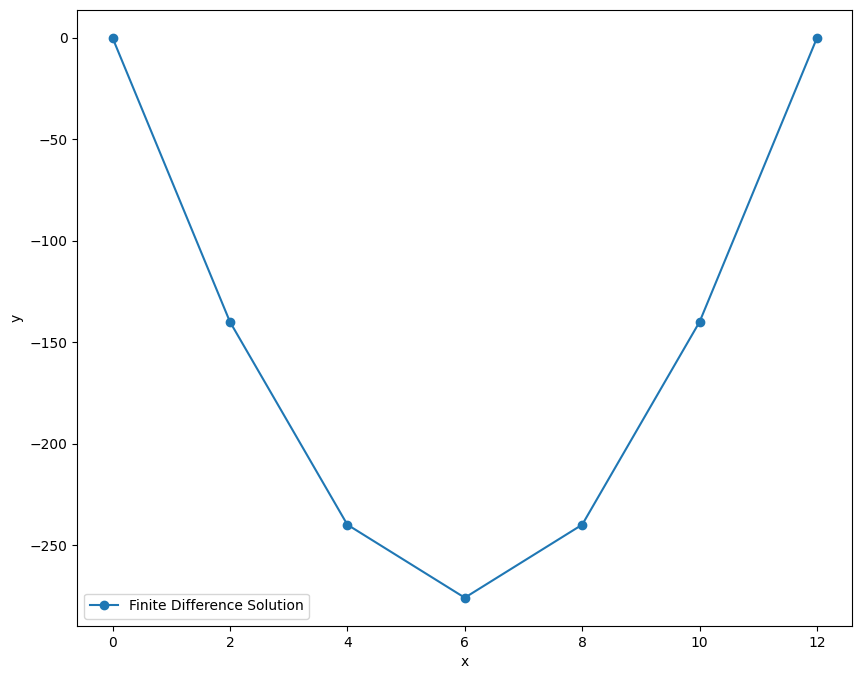

In [377]:
# initial parameters
n = 6
h = (12-0) / n
x = np.linspace(0, 12, n+1)

# Get A and b (Max Points: 5%)
# put your codes here
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

# Get b
# put your codes here
b = np.zeros(n+1)
b[0] = 0
b[1:-1] = (-0.5*x[1:-1]**2 +6*x[1:-1])*h**2
b[-1] = 0

# solve the linear equations and plot the results (Max Points: 5%)
# put your codes here
y = np.linalg.solve(A, b)

# plot the results
# put your codes here
plt.figure(figsize=(10,8))
plt.plot(x, y, 'o-', label='Finite Difference Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()





<u><h3>Soal 5 (Bobot: 20%)</h3></u>

<h4>Soal 5 A (Bobot: 10%)</h4>
Bangkitkan tiga sinyal berikut:<br/>
Sinyal 1 adalah gelombang sinus dengan 3 Hz, amplitude 5 dan phase shift 3,<br/>
Sinyal 2 adalah gelombang sinus dengan 4 Hz, amplitude 4 dan phase shift -2,<br/>
Sinyal 3 adalah gelombang sinus dengan 5 Hz, amplitude 3 dan phase shift 2.<br/>
Tambahkan ketiga gelombang ini bersama dengan sampling rate 128 Hz dan plot hasil gabungannya untuk 4 detik.

In [378]:
# generate the combined signals (Max Points: 10%)
# put your codes here
fs = 128
t = np.arange(0, 4, 1/fs)

sinyal1 = 5 * np.sin(2 * np.pi * 3 * t + 3)
sinyal2 = 4 * np.sin(2 * np.pi * 4 * t - 2)
sinyal3 = 3 * np.sin(2 * np.pi * 5 * t + 2)

sinyal_gabungan = sinyal1 + sinyal2 + sinyal3

<h4>Soal 5 B (Bobot: 10%)</h4>
Tulis kembali fungsi <b>Fast Fourier Transform/ FFT(x)</b> yang telah kita bahas di pertemuan terakhir kelas. Fungsi tersebut akan menghitung FFT dari sinyal yang ada dan mengembalikan nilai-nilai FFT-nya.<br/>
Terapkan fungsi FFT ini untuk sinyal yang baru saja kita buat di soal 5 A dan plot hasilnya!

In [379]:
# FFT function (Max Points: 5%)
def FFT(x, fs):
    fft_result = np.fft.fft(x)
    freq = np.fft.fftfreq(len(x), d=1/fs)
    return freq, fft_result
freq, fft_result = FFT(sinyal_gabungan, fs)

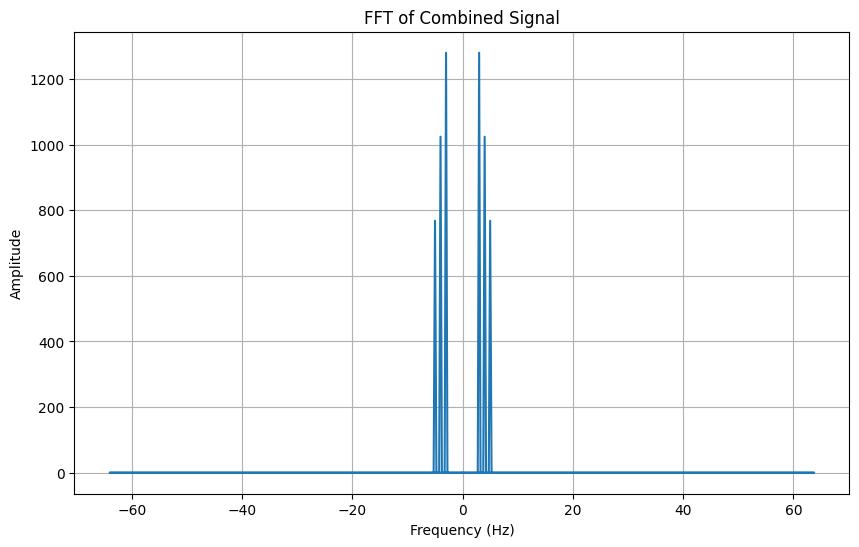

In [380]:
# plot the results (Max Points: 5%)
# put your codes here
plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of Combined Signal')
plt.grid(True)
plt.show()


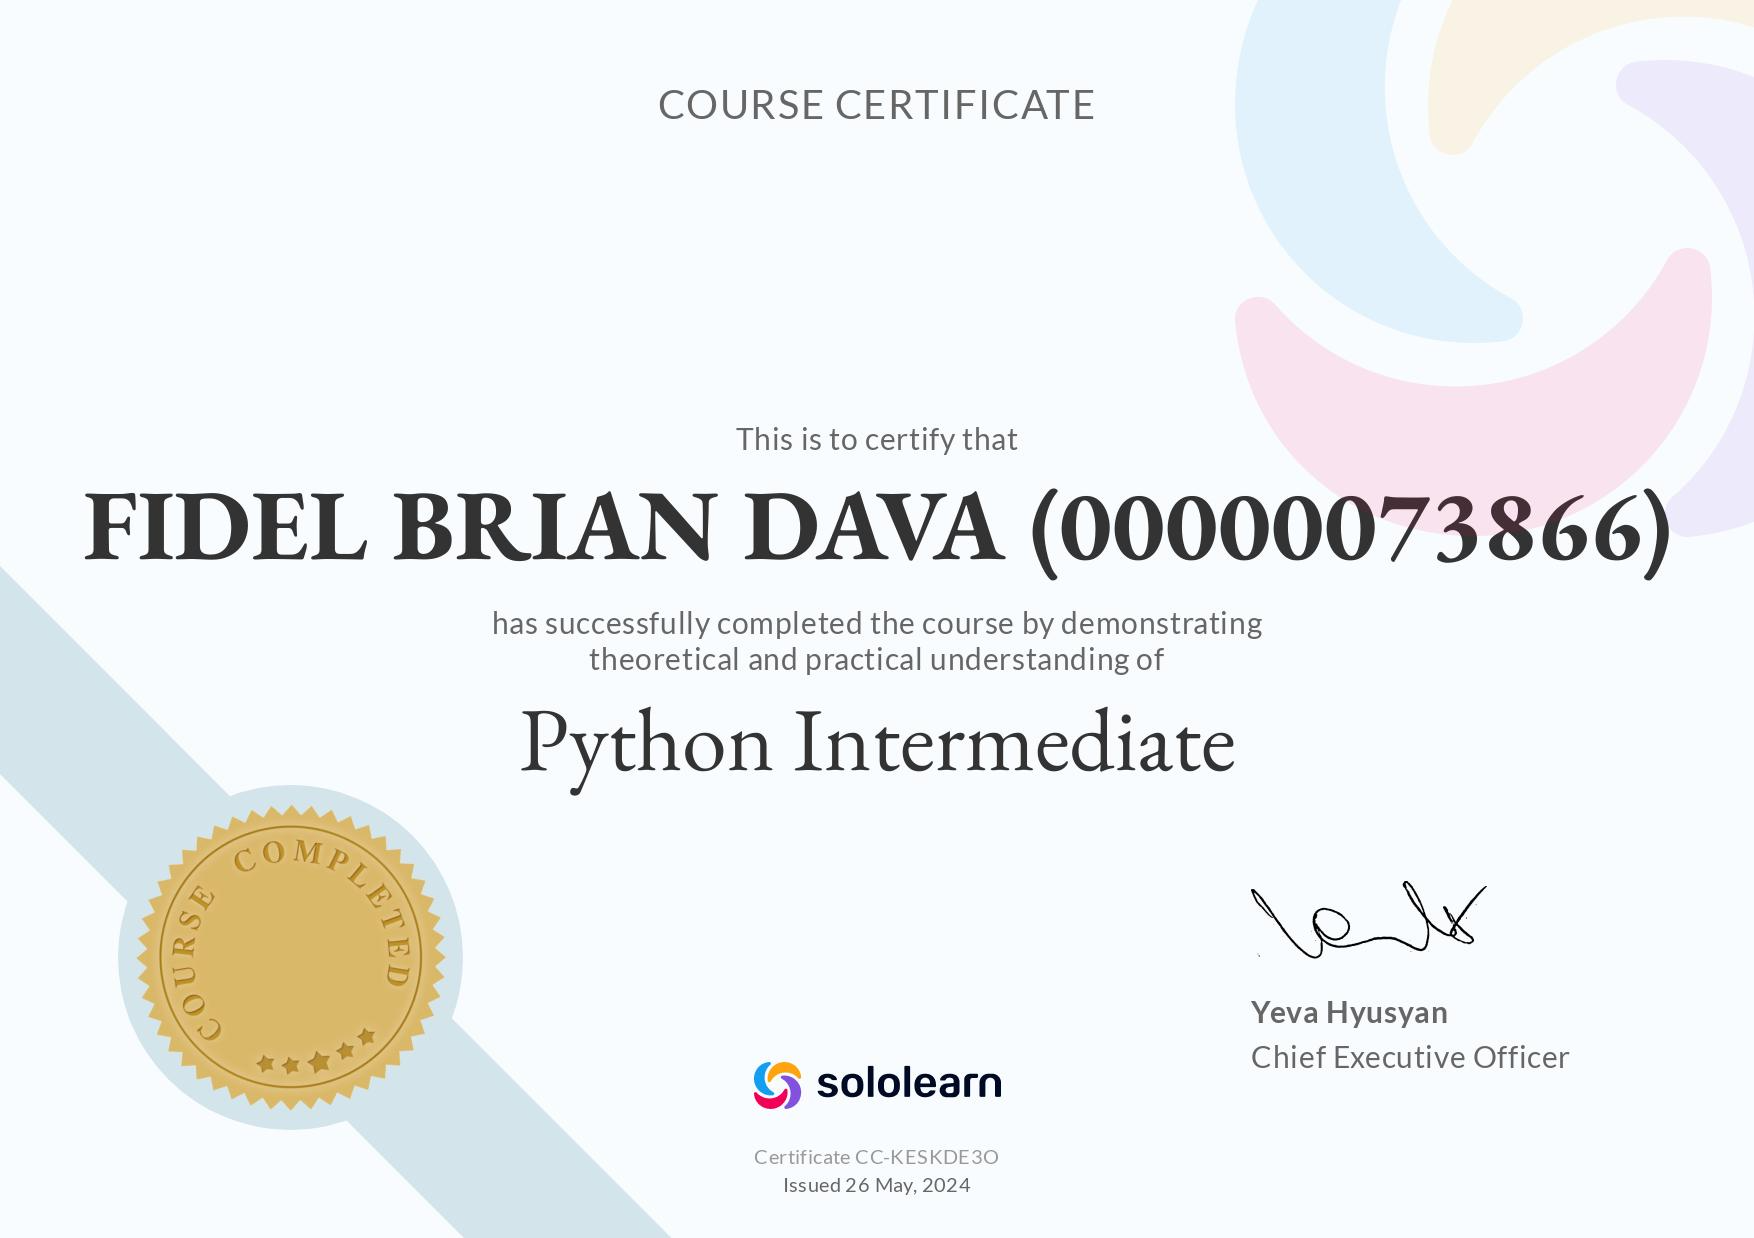